In [1]:
import boto3
import io
from PIL import Image, ImageDraw

In [12]:
!ls
!aws s3 ls

README.md	 Sample_Handwritten_text.png
Sample_Data.txt  Typed_Text_Analysis.ipynb
2022-10-17 15:02:25 markss
2022-11-06 19:51:49 qtm350final
2022-09-25 21:20:54 sagemaker-studio-946480578622-05kczvtq6qrg


In [11]:
!aws s3 mv Sample_Typed_text.png s3://qtm350final  #change the picture name and the bucket name here


The user-provided path Sample_Typed_text.png does not exist.


In [19]:
s3_connection = boto3.resource('s3')
                          
s3_object = s3_connection.Object("qtm350final","Sample_Typed_text.png") #change the picture name and the bucket name here
s3_response = s3_object.get()

stream = io.BytesIO(s3_response['Body'].read())
image=Image.open(stream)

In [6]:
client = boto3.client('textract')

In [17]:
response = client.detect_document_text(
    Document={'S3Object': {'Bucket': "qtm350final", 'Name': "Sample_Typed_text.png"}}) #change the picture name and the bucket name here

In [18]:
blocks=response['Blocks']
width, height =image.size    
print ('Detected Document Text')

Detected Document Text


In [15]:
# Displays information about a block returned by text detection and text analysis
def DisplayBlockInformation(block):
    print('Id: {}'.format(block['Id']))
    if 'Text' in block:
        print('    Detected: ' + block['Text'])
    print('    Type: ' + block['BlockType'])
   
    if 'Confidence' in block:
        print('    Confidence: ' + "{:.2f}".format(block['Confidence']) + "%")

    if block['BlockType'] == 'CELL':
        print("    Cell information")
        print("        Column: " + str(block['ColumnIndex']))
        print("        Row: " + str(block['RowIndex']))
        print("        ColumnSpan: " + str(block['ColumnSpan']))
        print("        RowSpan: " + str(block['RowSpan']))    
    
    if 'Relationships' in block:
        print('    Relationships: {}'.format(block['Relationships']))
    print('    Geometry: ')
    print('        Bounding Box: {}'.format(block['Geometry']['BoundingBox']))
    print('        Polygon: {}'.format(block['Geometry']['Polygon']))
    
    if block['BlockType'] == "KEY_VALUE_SET":
        print ('    Entity Type: ' + block['EntityTypes'][0])
    if 'Page' in block:
        print('Page: ' + block['Page'])
    print()

Type: PAGE
Id: 2fdba32d-1145-4bba-88ed-cd324ecfb494
Relationships: [{'Type': 'CHILD', 'Ids': ['f51bedaa-4b44-41b5-9f89-7f911b98dee7', '05a0b997-56e2-4f1b-9c13-ca13c8fbdc10', '63352da5-d892-449e-9a85-8dd27e9e58fc', '5d8aad20-ce7f-4862-b280-0ad88434127e', 'fa73b136-3df6-4703-b83a-4b70f6ba653d', '42a2987e-55df-4b80-b4f9-efea1ca99dc9', '0028161e-76cf-445a-b78f-2e6f4e067d66', 'dd5f054c-a414-4a35-89c1-591c27874aef', '340c5fd7-f8b1-4f13-ae00-64b5d9cf7d6e', '632d26e8-baa2-46ed-84d3-efb59da9ba83', '79cc0f3e-59ac-42bd-958e-0be4b4817c01', '9993bc6b-d4b3-4d95-8ae5-aa3aff6bc883', 'b1f270c1-d0bd-4dbe-b6ca-9cd62acfe553', '5053917e-4d1b-4fd3-b4c5-06f1ef7616c1', 'bd2cc5f8-0f44-41ef-900a-37b3a8324d40', 'f16ed24d-e4f2-44f4-b5b1-cb582f40badc', 'e7a13fb4-26f6-43d0-ba52-9a65edd2778f', '5a3047d3-a233-46da-b23f-fcbbc222d665']}]
Bounding Box: {'Width': 1.0, 'Height': 1.0, 'Left': 0.0, 'Top': 0.0}
Polygon: [{'X': 0.0, 'Y': 2.076260443573119e-06}, {'X': 1.0, 'Y': 0.0}, {'X': 1.0, 'Y': 1.0}, {'X': 1.0994192962243

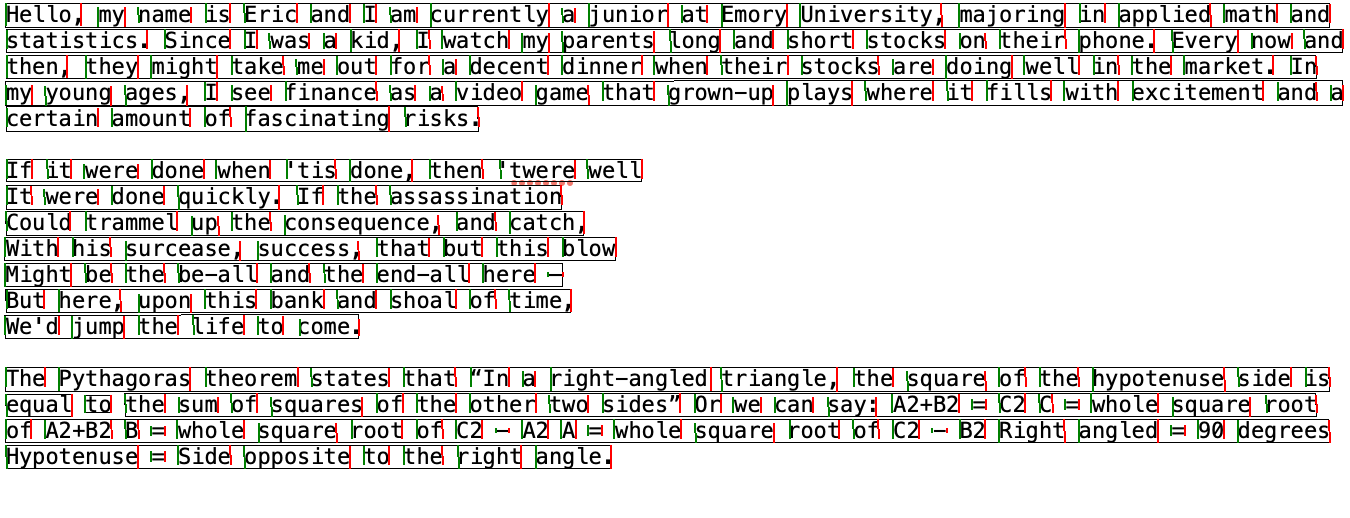

231

In [16]:
for block in blocks:
            print('Type: ' + block['BlockType'])
            if block['BlockType'] != 'PAGE':
                print('Detected: ' + block['Text'])
                print('Confidence: ' + "{:.2f}".format(block['Confidence']) + "%")

            print('Id: {}'.format(block['Id']))
            if 'Relationships' in block:
                print('Relationships: {}'.format(block['Relationships']))
            print('Bounding Box: {}'.format(block['Geometry']['BoundingBox']))
            print('Polygon: {}'.format(block['Geometry']['Polygon']))
            print()
            draw=ImageDraw.Draw(image)
            # Draw WORD - Green -  start of word, red - end of word
            if block['BlockType'] == "WORD":
                draw.line([(width * block['Geometry']['Polygon'][0]['X'],
                height * block['Geometry']['Polygon'][0]['Y']),
                (width * block['Geometry']['Polygon'][3]['X'],
                height * block['Geometry']['Polygon'][3]['Y'])],fill='green',
                width=2)
            
                draw.line([(width * block['Geometry']['Polygon'][1]['X'],
                height * block['Geometry']['Polygon'][1]['Y']),
                (width * block['Geometry']['Polygon'][2]['X'],
                height * block['Geometry']['Polygon'][2]['Y'])],
                fill='red',
                width=2)    

                 
            # Draw box around entire LINE  
            if block['BlockType'] == "LINE":
                points=[]

                for polygon in block['Geometry']['Polygon']:
                    points.append((width * polygon['X'], height * polygon['Y']))

                draw.polygon((points), outline='black')    

    # Display the image
image.show()
len(blocks)